### Load model mechanisms

In [2]:
modelPath = 'Models/LiCleland2013'

import os
os.chdir(modelPath)

from neuron import h

### Import required packages

In [3]:
%matplotlib inline
import matplotlib.pyplot as g

from neuronunit.neuron.models import *
from neuronunit.tests import *
import neuronunit.neuroelectro
from quantities import nA, pA, s, ms, mV

### Create a Mitral Cell

In [9]:
# This creates an isolated, resting cell (taken from MC_stim.hoc)
h.xopen("tabchannels.hoc")
h.load_file("MC_def.hoc")         
h.celsius = 35 
h.v_init = -68.9
cell = h.Mitral(0.0e-3)

soma = cell.soma

### Create a NeuronUnit model using the cell

In [26]:
mod1 = SingleCellModel(hVar = h, \
                       section = soma, \
                       loc = 0.5, # Current and voltage injection and measurement location on the section \
                       name = "LiCleland2013")

mod1.setIntegrationMethod("fixed")  # Or "variable"
mod1.setTimeStep(1/32.0 * ms) # 2^-n are preferable
mod1.setTolerance() # Only needed if "variable"
mod1.setStopTime(500*ms)

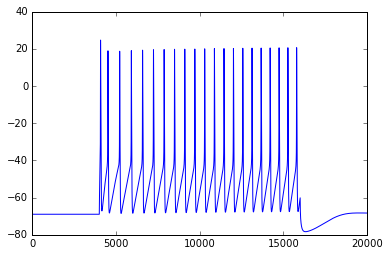

In [35]:
mod1.inject_square_current({'amplitude': 1.8*nA, 'delay': 100*ms, 'duration': 300*ms})

g.plot(mod1.get_membrane_potential())

### Define tests to run

In [11]:
# Define which cell's properties to get
# 'nlx_anat_100201' is from Olfactory bulb mitral cell, 
# obtained from http://neuroelectro.org/neuron/129/ (Details)
neuron = {'nlex_id': 'nlx_anat_100201'} 

# Define injection current
i = {'injected_square_current': {'amplitude': 0.5*nA, 'delay': 200*ms, 'duration': 100*ms} }

# Define the tests to perform on the cell
testTypes = [ \
    [InputResistanceTest, None],
    [RestingPotentialTest, None],
    [InjectedCurrentAPWidthTest, i], \
    [InjectedCurrentAPThresholdTest, i], \
    [InjectedCurrentAPAmplitudeTest, i],
]
     
tests = []

### Obtain Pooled Property Values from NeuroElectro.org

In [12]:
# Fetch NeuroElectro property values for each test
for t in xrange(len(testTypes)):
    testType = testTypes[t][0]
    params = testTypes[t][1]
    
    # Get the observations: property means and stds
    obs = testType.neuroelectro_pooled_observation(neuron, quiet=False)
    
    # Create a test instance using the observations
    test = testType(obs)
    
    if(params is not None):
        test.params = params
    
    tests.append(test)
    
# Create a test suite    
suite = sciunit.TestSuite("O'Connor 2012 Tests", tests)

Getting data values from neuroelectro.org
http://www.neuroelectro.org/api/1/nedm/?nlex=nlx_anat_100201&limit=999&e__name=Input+Resistance&
Raw Values
{'std': None, 'sem': 11.6, 'n': None, 'mean': 32.9}
{'std': None, 'sem': 10.0, 'n': None, 'mean': 128.0}
{'std': None, 'sem': 16.0, 'n': None, 'mean': 115.0}
{'std': None, 'sem': 10.0, 'n': None, 'mean': 124.0}
{'std': None, 'sem': 4.0, 'n': None, 'mean': 107.0}
{'std': None, 'sem': 36.1, 'n': None, 'mean': 208.7}
{'std': None, 'sem': 16.6, 'n': None, 'mean': 118.0}
{'std': None, 'sem': 4.0, 'n': None, 'mean': 68.0}
{'std': None, 'sem': 5.6, 'n': None, 'mean': 59.0}
{'std': None, 'sem': 33.0, 'n': None, 'mean': 236.0}
{'std': None, 'sem': 7.8, 'n': None, 'mean': 103.0}
{'std': None, 'sem': 13.0, 'n': None, 'mean': 214.0}
{'std': None, 'sem': 20.3, 'n': None, 'mean': 47.4}
{'std': None, 'sem': 110.0, 'n': None, 'mean': 240.0}
{'std': None, 'sem': 23.0, 'n': None, 'mean': 299.0}
{'std': None, 'sem': 7.0, 'n': None, 'mean': 19.0}
{'std': Non

### Evaluate the model

In [16]:
score = suite.judge(mod1)
score.view()

A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation
A Z score. A float indicating standardized difference from a reference mean.
The difference between the means of the observation and prediction divided by the standard deviation of the observation


,Input resistance,Resting potential,Injected current AP width,Injected current AP threshold,Injected current AP amplitude
OConnor2012,Z = nan,Z = -3.64,Z = 17.08,Z = 0.66,Z = 11.85


In [28]:
(tests[1].generate_prediction(mod1), tests[1].observation, tests[1].judge(mod1))

({'mean': array(-68.28201645265179) * mV,
  'std': array(0.16417962548970916) * mV},
 {'mean': array(-54.91352639293467) * mV,
  'n': 768,
  'std': array(3.5966632268270806) * mV},
 Z = -3.72)

{'mean': array(-54.91352639293467) * mV,
 'n': 768,
 'std': array(3.5966632268270806) * mV}

Z = -3.72